# Comunicados de Política Monetaria
## Parte 1.

En este notebook crearemos un pandas DataFrame con las decisiones de política monetaria de Banxico y haremos un análisis de la información recabada.

In [ ]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
from requests_html import HTMLSession
from collections import defaultdict
from unidecode import unidecode
from datetime import datetime

In [ ]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 4)

La información de decisción de política monetaria se encuentra en la siguiente url.

In [ ]:
url = ("https://www.banxico.org.mx/publicaciones-y-prensa/"
      "anuncios-de-las-decisiones-de-politica-monetaria/"
      "anuncios-politica-monetaria-t.html")

* Entra a `url` y analiza la página.

In [ ]:
print(url)

* Como podemos observar, la url objetivo contiene
    * las fechas de decisiones de política monetaria,
    * el resumen de las decisiones de política monetaria y
    * una url que nos dirige a un pdf con el texto completo del Anuncio de Política Monetaria.
    
<h3 style="color:crimson">Ejercicio</h3>

1. Por medio de `requests_html`, extrae los tres puntos antes mencionados y guárdalos dentro de un DataFrame con columnas `"date"`, `"text"` y `"url"`;
2. Con el dataframe seleccionado, filtra todos comunicados anteriores al 15 de febrero de 2008, i.e., queremos todos los comunicados a partir del 15 de Febrero de 2008;
3. Guarda tu DataFrame dentro de un archivo `.pkl` con nombre `comunicados-banxico.pkl`: **hint:** Revisa el uso del método `to_pickle`.

<h3 style="color:crimson">Ejercicio</h3>

Por medio del método `str.extract` para un pandas Series, crea una nueva columna `"category"` que extraiga del texto si la tasa se 
1. `"mantiene"`
2. `"incrementa"`
3. `"disminuye"`

<h3 style="color:crimson">Ejercicio</h3>

Cuenta las veces en las que la tasa se mantuvo, se incrementó o se disminuyó.

<h3 style="color:crimson">Ejercicio</h3>

Reproduce la siguiente figura sobre los comunicados de prensa de Banxico:
1. La gráfica de la izquierda representa una serie de tiempo sobre los comunicados de banxico. Si `y=1`, la tasa de referencia se incrementó; si `y=0`, la tasa se mantuvo; finalmente, si `y=-1`, la tasa disminuyó.
2. La gráfica de la derecha es una gráfica de barras del ejercicio anterior

<h3 style="color:crimson">Ejercicio</h3>

Agrupa por año y cuenta el número de comunicados en un año para cada categoría.

<h3 style="color:crimson">Ejercicio</h3>

Con el resultado anterior, replica la siguiente gráfica

## Respuestas

1. Por medio de `requests_html`, extrae los tres puntos antes mencionados y guárdalos dentro de un DataFrame con columnas `"date"`, `"text"` y `"url"`;
2. Con el dataframe seleccionado, filtra todos comunicados anteriores al 15 de febrero de 2008, i.e., queremos todos los comunicados a partir del 15 de Febrero de 2008;
3. Guarda tu DataFrame dentro de un archivo `.pkl` con nombre `comunicados-banxico.pkl`: **hint:** Revisa el uso del método `to_pickle`.

In [2]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
from requests_html import HTMLSession
from collections import defaultdict
from unidecode import unidecode
from datetime import datetime

In [3]:
url = ("https://www.banxico.org.mx/publicaciones-y-prensa/"
      "anuncios-de-las-decisiones-de-politica-monetaria/"
      "anuncios-politica-monetaria-t.html")

In [4]:
from requests_html import HTMLSession

with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [5]:
fields = r.html.find("td[class='bmtextview']")

In [6]:
fieldsv = r.html.find("td[class='bmdateview']")

In [10]:
values = []
for field in zip(fields, fieldsv):
    text, *_ = re.findall(".+(?=\n.*)", field[0].text)
    fecha = datetime.strptime(field[1].text, "%d/%m/%y").date()
    links, *_ = field[0].absolute_links
    values.append([fecha, text, links])

df = pd.DataFrame(values, columns = ["fecha","text", "url"])
df.set_index("fecha", inplace = True)    
    

In [11]:
df.sort_index(inplace  = True)

In [12]:
df.head()

,text,url
fecha,,
2000-01-18,"El ""corto"" se aumenta a 180 millones de pesos",https://www.banxico.org.mx/publicaciones-y-pre...
2000-05-16,"El ""corto"" se aumenta a 200 millones de pesos",https://www.banxico.org.mx/publicaciones-y-pre...
2000-06-26,"El ""corto"" se aumenta a 230 millones de pesos",https://www.banxico.org.mx/publicaciones-y-pre...
2000-07-31,"El ""corto"" se aumenta a 280 millones de pesos",https://www.banxico.org.mx/publicaciones-y-pre...
2000-10-17,"El ""corto"" se aumenta a 310 millones de pesos",https://www.banxico.org.mx/publicaciones-y-pre...


In [13]:
df.tail()

,text,url
fecha,,
2019-08-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-09-26,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-11-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-12-19,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2020-02-13,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


In [14]:
df.shape

(184, 2)

In [15]:
df.index = pd.to_datetime(df.index)
df = df.loc["2008-02-15":,]

In [53]:
df.to_pickle("comunicados-banxico.pkl")

In [17]:
df.shape

(106, 2)

<h3 style="color:crimson">Ejercicio</h3>

Por medio del método `str.extract` para un pandas Series, crea una nueva columna `"category"` que extraiga del texto si la tasa se 
1. `"mantiene"`
2. `"incrementa"`
3. `"disminuye"`

In [18]:
df = df.assign(category = df['text'].str.extract("(mantiene|incrementa|disminuye)", expand = False), )

In [19]:
df.head()

,text,url,category
fecha,,,
2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,incrementa


In [20]:
df.tail()

,text,url,category
fecha,,,
2019-08-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-09-26,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-11-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-12-19,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2020-02-13,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye


<h3 style="color:crimson">Ejercicio</h3>

Cuenta las veces en las que la tasa se mantuvo, se incrementó o se disminuyó.

In [21]:
aux =df['category'].value_counts()

In [22]:
aux

mantiene      72
incrementa    18
disminuye     16
Name: category, dtype: int64

<h3 style="color:crimson">Ejercicio</h3>

Reproduce la siguiente figura sobre los comunicados de prensa de Banxico:
1. La gráfica de la izquierda representa una serie de tiempo sobre los comunicados de banxico. Si `y=1`, la tasa de referencia se incrementó; si `y=0`, la tasa se mantuvo; finalmente, si `y=-1`, la tasa disminuyó.
2. La gráfica de la derecha es una gráfica de barras del ejercicio anterior

In [24]:
values_category = {'mantiene':0, 'incrementa':1, 'disminuye':-1}

In [25]:
df['y'] = [values_category[i] for i in df['category']]

Text(0.5, 0.98, 'Comunicados banxico')

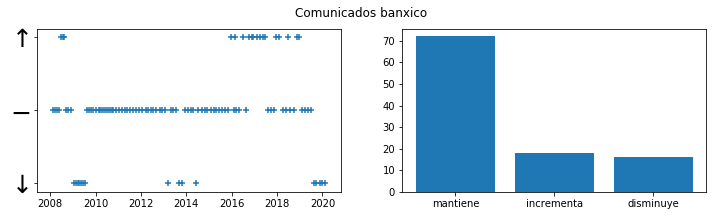

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].scatter(df.index, df.y, marker = '+')
axs[0].set_yticks((-1, 0, 1))
axs[0].set_yticklabels([r"$\downarrow$", r"$\minus$", r"$\uparrow$"],size=25)

axs[1].bar(aux.index, aux.values)

fig.suptitle('Comunicados banxico')

<h3 style="color:crimson">Ejercicio</h3>

Agrupa por año y cuenta el número de comunicados en un año para cada categoría.

In [33]:
aux_2 = df.groupby([pd.Grouper(freq='Y'), 'category'])['y'].count()
aux_2

fecha       category  
2008-12-31  incrementa     3
            mantiene       7
2009-12-31  disminuye      7
            mantiene       4
2010-12-31  mantiene      11
2011-12-31  mantiene       8
2012-12-31  mantiene       8
2013-12-31  disminuye      3
            mantiene       5
2014-12-31  disminuye      1
            mantiene       7
2015-12-31  incrementa     1
            mantiene       7
2016-12-31  incrementa     5
            mantiene       4
2017-12-31  incrementa     5
            mantiene       3
2018-12-31  incrementa     4
            mantiene       4
2019-12-31  disminuye      4
            mantiene       4
2020-12-31  disminuye      1
Name: y, dtype: int64

<h3 style="color:crimson">Ejercicio</h3>

Con el resultado anterior, replica la siguiente gráfica

In [34]:
df_plot = pd.DataFrame(aux_2)

In [39]:
df_plot.reset_index(level = 1, inplace = True)
df_plot.index = df_plot.index.year

In [42]:
df_plot.head()

,category,y
fecha,,
2008,incrementa,3
2008,mantiene,7
2009,disminuye,7
2009,mantiene,4
2010,mantiene,11


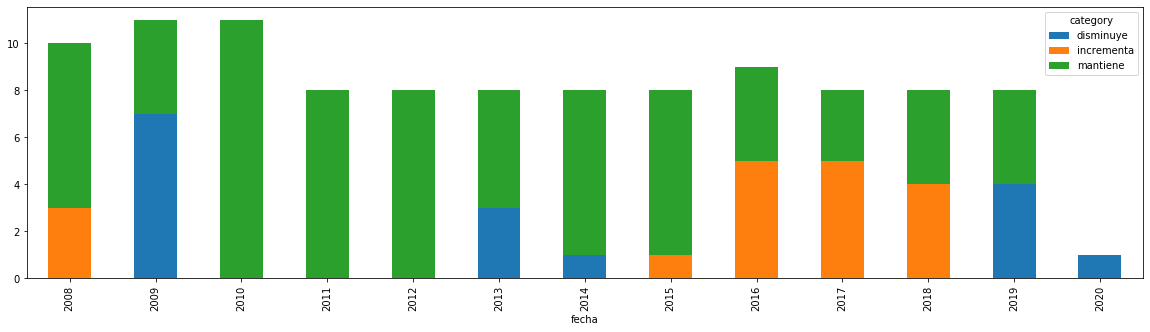

In [52]:
df_plot.pivot_table(index=df_plot.index,columns="category",values="y")\
        .plot.bar(stacked = True, figsize = (20,5))